In [1]:
import seaborn as sns
sns.set_palette('colorblind')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


import sys

sys.path.append('../')

from library_analyzer import Library, gaussian_kde, line_plotter, correspondance_plotter

In [2]:
mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'

sheet_name = 'Original_Data'

aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

# colorscheme = 'RdBu'
# WT_color = 'xkcd:violet'

sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
to_red_cmap = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)

In [3]:
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)


In [4]:
replicates = {'lib1_rep1':['P0_R1','P10_R1'],
              'lib1_rep2':['P0_R2','P10_R2']}
wt_aa = 'DEPSDLEELEKFAKTFKQRRIKLGFTQGDVGLAMGKLYGNDFSQTTISRFEALNL'
id_cols = ['id']
process_call = 'id'
data_file = './Library_1.xlsx'

lib1 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)


plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib1.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()




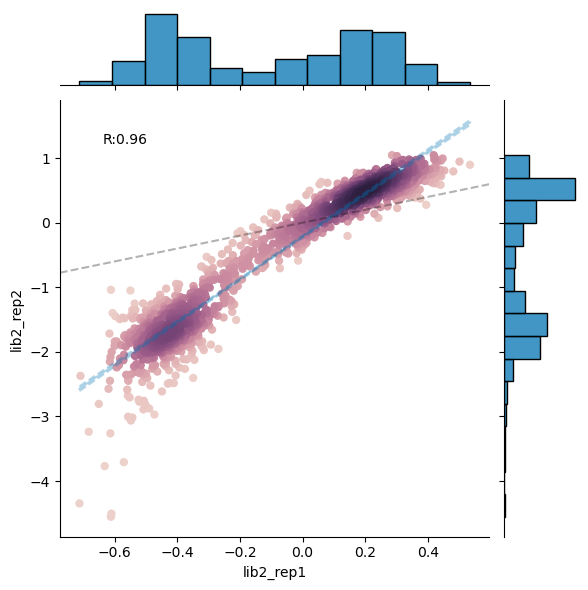

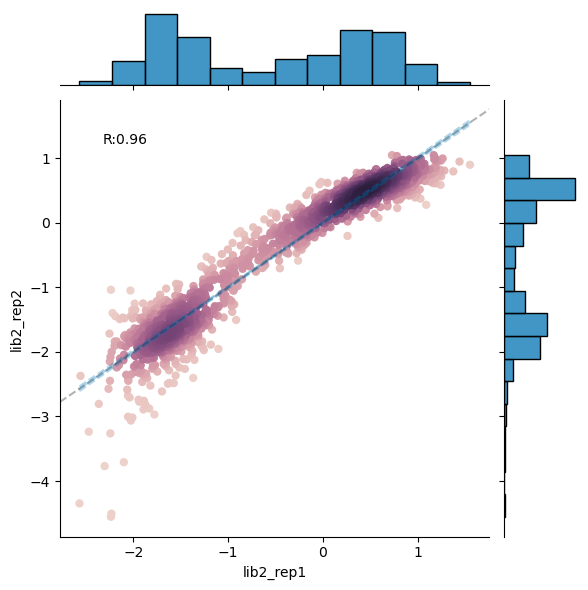

In [5]:
replicates = {'lib2_rep1':['P0_Rep1','P10_Rep1'],
              'lib2_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'EALNLSFKNMCKLKPLLEKWLNDAESSPSDPSVSTPSSYPSLSEVFGRKRKKRTSIETNIRLTLEKRFQD'
id_cols = ['ID']
process_call = 'ID'
data_file = './Library_2.xlsx'

lib2 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

lib2, fig_pre, fig_post = lib2.rescale_by_replicate_group('lib2_rep2','lib2_rep1')


plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib2.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

In [6]:
replicates = {'lib3_rep1':['P0_Rep1','P10_Rep1'],
              'lib3_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'RFQDNPKPSSEEISMIAEQLSMEKEVVRVWFCNRRQKEKRINCPVATPIKPPVYN'
id_cols = ['ID']
process_call = 'ID'
data_file = './Library_3.xlsx'

lib3 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'foo','positions':[2,5,7,38], 'color':'xkcd:purple'},
     {'name':'bar','positions':[2,4,8,16,32], 'color':'xkcd:green'},
      {'name':'baz','positions':[2,52], 'color':'xkcd:yellow'}
]

heatmap_fig, axd = lib3.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,8), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0],cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

In [7]:
lib1.id_cols=['ID']
lib1.data_df = lib1.data_df.rename(columns={'id':'ID'},level=1)

lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib2,lib1,50,0, lib1.WT_seq+lib2.WT_seq[5:], control_col='AA',control_val=['WT','*'],automatically_rescale_by_controls=True)
# plt.show()

/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dest_df[('meta',position_col)][~wt_mask] = dest_df[('meta',position_col)][~wt_mask].astype(int)+dest_position_shift
/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_df[('meta',position_col)][~wt_mask] = source_df[('meta',position_col)][~wt_mask].astype(int)+source_position_shift
/Users/jackdesmarais/miniconda3/envs/Vakoc_library_analysis/lib/python3.9/site

In [8]:
lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib_merged,lib3,0,116, lib_merged.WT_seq+lib3.WT_seq[4:],automatically_rescale_linearly=True)

/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dest_df[('meta',position_col)][~wt_mask] = dest_df[('meta',position_col)][~wt_mask].astype(int)+dest_position_shift
/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_df[('meta',position_col)][~wt_mask] = source_df[('meta',position_col)][~wt_mask].astype(int)+source_position_shift


In [9]:
lib_merged.data_df

FC                                                        l2fc  \
      lib1_rep1 lib1_rep2 lib2_rep1 lib2_rep2 lib3_rep1 lib3_rep2 lib1_rep1   
0           NaN       NaN  0.653091  0.287107       NaN       NaN       NaN   
1           NaN       NaN  0.752159  0.266819       NaN       NaN       NaN   
2           NaN       NaN  0.737150  0.231206       NaN       NaN       NaN   
3           NaN       NaN  0.687277  0.377590       NaN       NaN       NaN   
4           NaN       NaN  0.687173  0.255028       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
19767       NaN       NaN       NaN       NaN  1.083137  1.037204       NaN   
19768       NaN       NaN       NaN       NaN  1.096835  1.012272       NaN   
19769       NaN       NaN       NaN       NaN  0.962689  0.945154       NaN   
19770       NaN       NaN       NaN       NaN  1.076889  1.151674       NaN   
19771       NaN       NaN       NaN       NaN  1.240871  1.299227       NaN   

                                     ... lib3_rep1_counts lib3_rep2_abundance  \
      lib1_rep2 lib2_rep1 lib2_rep2  ...         P10_Rep1             P0_Rep2   
0           NaN -2.247041 -1.800341  ...              NaN                 NaN   
1           NaN -1.573415 -1.906067  ...              NaN                 NaN   
2           NaN -1.669556 -2.112750  ...              NaN                 NaN   
3           NaN -2.003686 -1.405106  ...              NaN                 NaN   
4           NaN -2.004408 -1.971272  ...              NaN                 NaN   
...         ...       ...       ...  ...              ...                 ...   
19767       NaN       NaN       NaN  ...           6980.0            0.000173   
19768       NaN       NaN       NaN  ...           7897.0            0.000160   
19769       NaN       NaN       NaN  ...           5824.0            0.000167   
19770       NaN       NaN       NaN  ...           7528.0            0.000162   
19771       NaN       NaN       NaN  ...           7255.0            0.000147   

                lib3_rep2_counts          meta                               \
       P10_Rep2          P0_Rep2 P10_Rep2   AA          ID Mut_num Position   
0           NaN              NaN      NaN    K  1pt_01K_v3       1     51.0   
1           NaN              NaN      NaN    K  1pt_01K_v5       1     51.0   
2           NaN              NaN      NaN    K  1pt_01K_v1       1     51.0   
3           NaN              NaN      NaN    K  1pt_01K_v4       1     51.0   
4           NaN              NaN      NaN    N  1pt_01N_v3       1     51.0   
...         ...              ...      ...  ...         ...     ...      ...   
19767  0.000180           6514.0   5077.0    F  1pt_01F_v3       1    117.0   
19768  0.000162           6025.0   4583.0    F  1pt_01F_v1       1    117.0   
19769  0.000158           6267.0   4451.0    F  1pt_01F_v5       1    117.0   
19770  0.000186           6078.0   5260.0    F  1pt_01F_v2       1    117.0   
19771  0.000191           5526.0   5395.0    F  1pt_01F_v4       1    117.0   

               
      Version  
0           3  
1           5  
2           1  
3           4  
4           3  
...       ...  
19767       3  
19768       1  
19769       5  
19770       2  
19771       4  

[19772 rows x 41 columns]

In [10]:
lib_merged.replicates

{'lib2_rep1': ['P0_Rep1', 'P10_Rep1'],
 'lib2_rep2': ['P0_Rep2', 'P10_Rep2'],
 'lib1_rep1': ['P0_R1', 'P10_R1'],
 'lib1_rep2': ['P0_R2', 'P10_R2'],
 'lib3_rep1': ['P0_Rep1', 'P10_Rep1'],
 'lib3_rep2': ['P0_Rep2', 'P10_Rep2']}

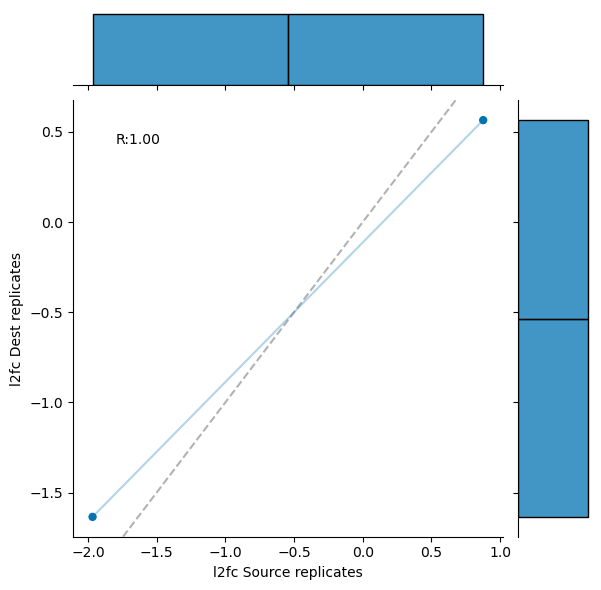

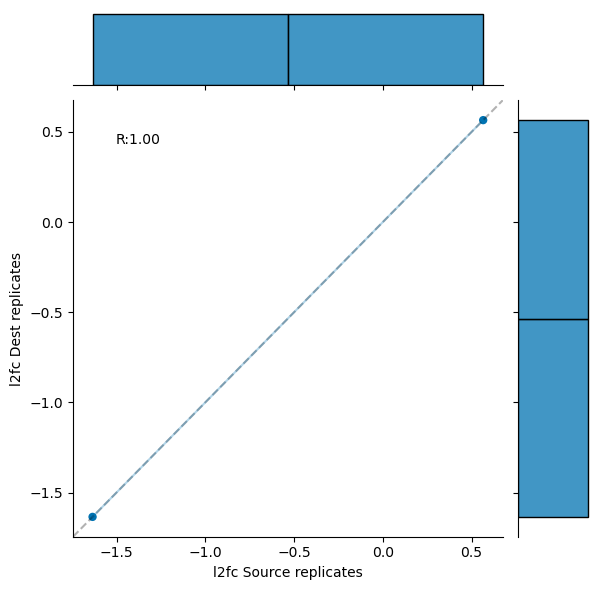

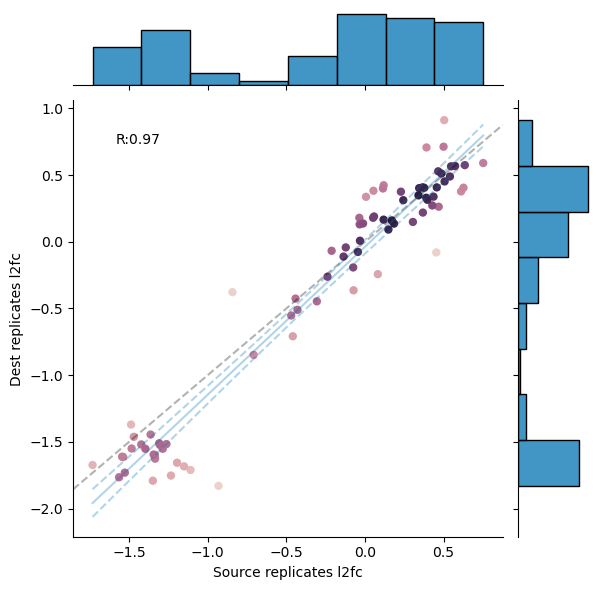

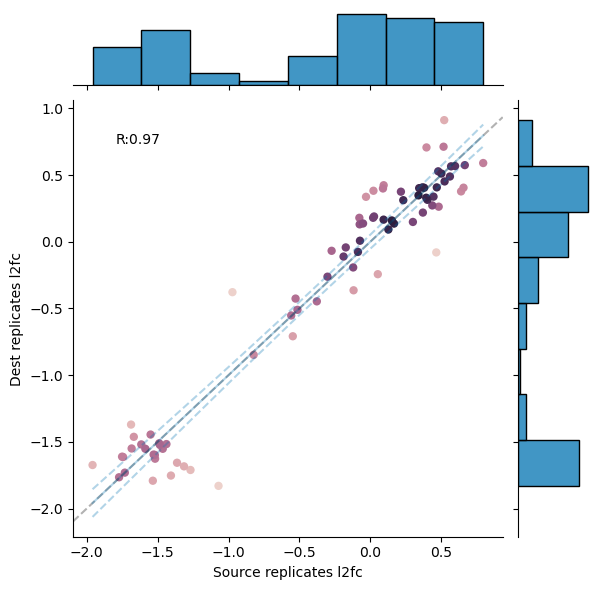

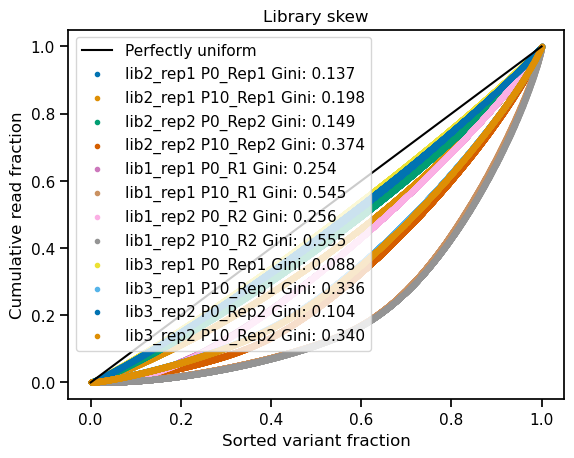

In [11]:
lib_merged.check_skew()
plt.show()

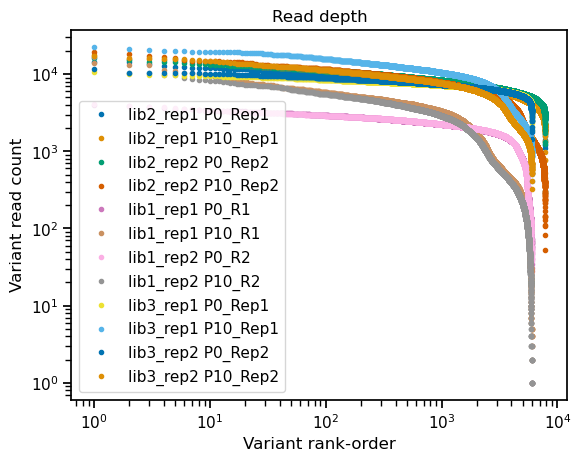

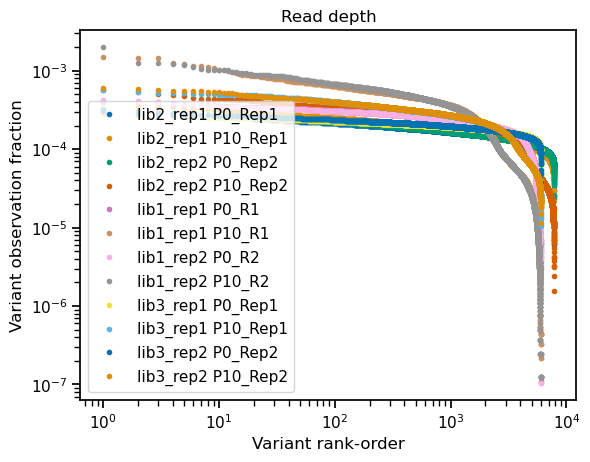

In [12]:
lib_merged.check_depth()
plt.show()

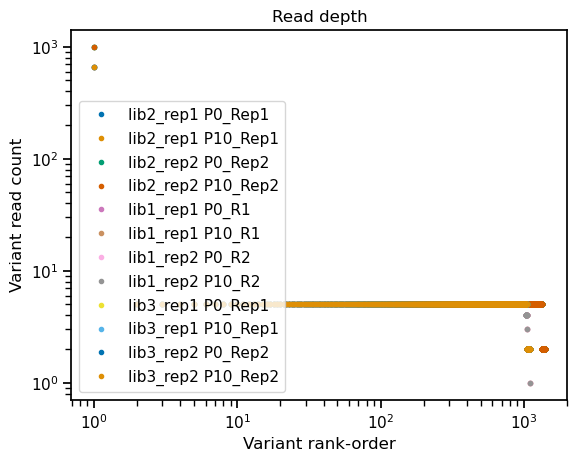

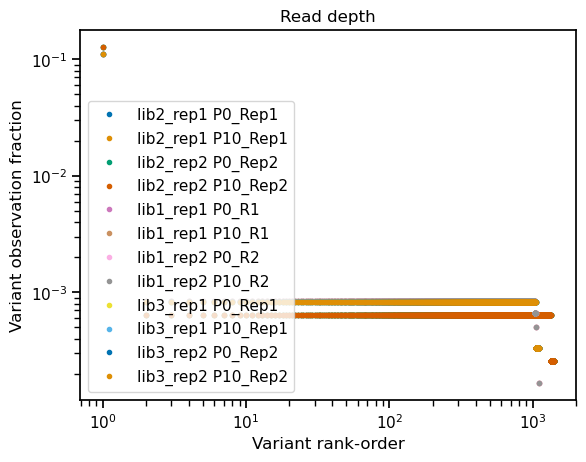

In [13]:
lib_merged.check_barcode_distribution_depth()
plt.show()

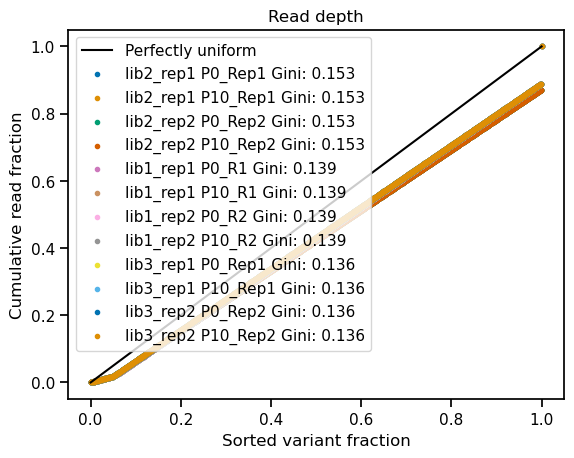

In [14]:
lib_merged.check_barcode_distribution_skew()
plt.show()

Number of true positives: 2330
lib1_rep1 The optimal threshold range is from -0.9012399210231798 to -0.3993033803894983
The ROCs at specific thresholds are- opt min: [1.], opt max: [1.]
The TPRs at specific thresholds are- opt min: [1.], opt max: [1.]
The FPRs at specific thresholds are- opt min: [0.], opt max: [0.]
The optimal f-score threshold range is from -0.9012399210231798 to -0.3993033803894983
The optimal g-mean threshold range is from -0.9012399210231798 to -0.3993033803894983
lib1_rep2 The optimal threshold range is from -0.6477739346286842 to -0.24742949287120108
The ROCs at specific thresholds are- opt min: [0.99082569], opt max: [0.99082569]
The TPRs at specific thresholds are- opt min: [1.], opt max: [1.]
The FPRs at specific thresholds are- opt min: [0.00917431], opt max: [0.00917431]
The optimal f-score threshold range is from -0.6477739346286842 to -0.24742949287120108
The optimal g-mean threshold range is from -0.6477739346286842 to -0.24742949287120108
lib2_rep1 The 

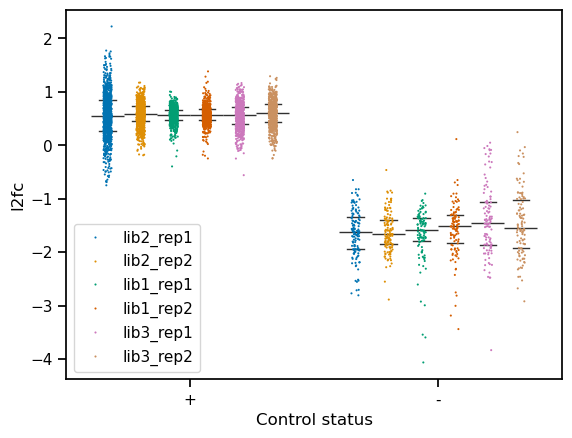

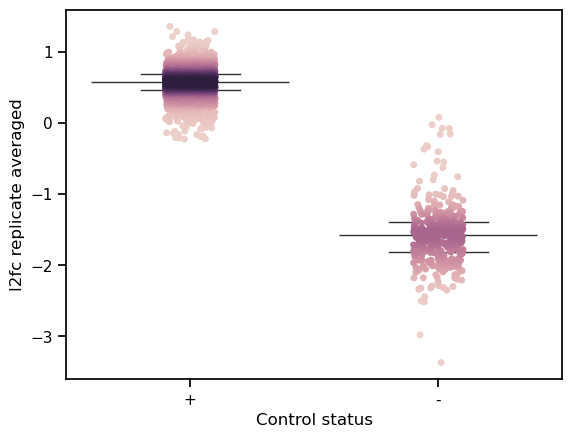

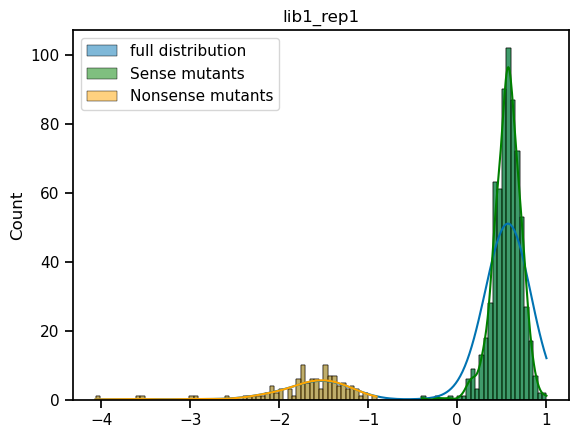

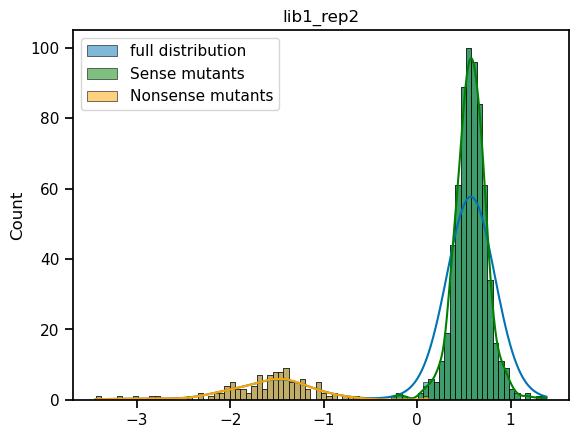

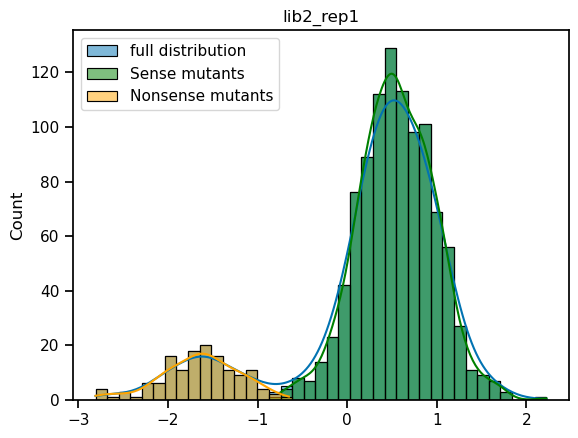

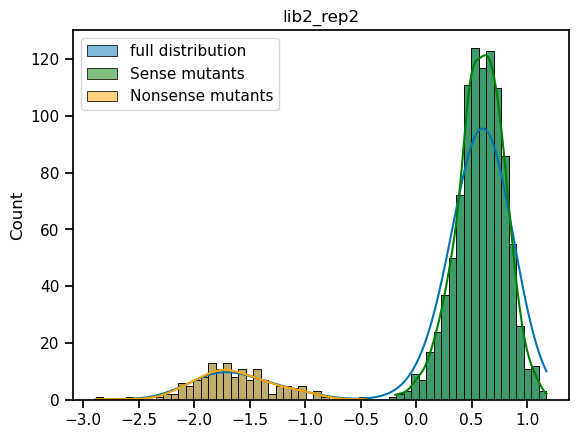

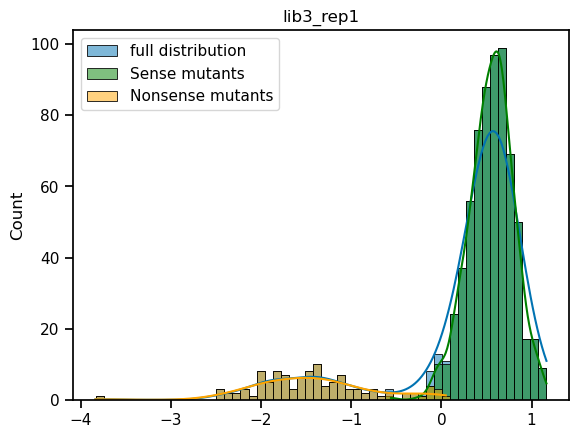

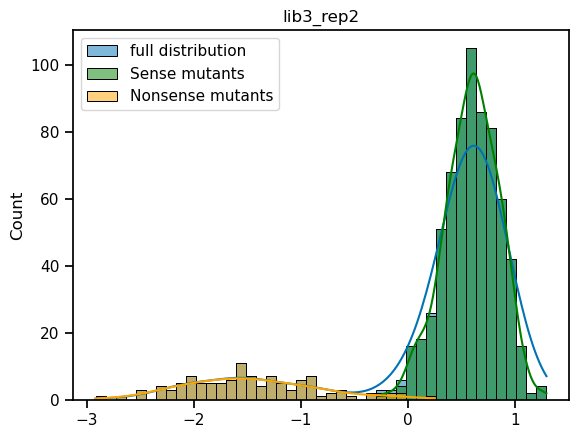

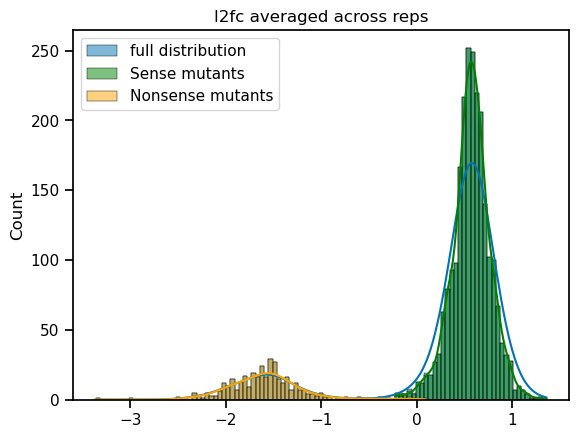

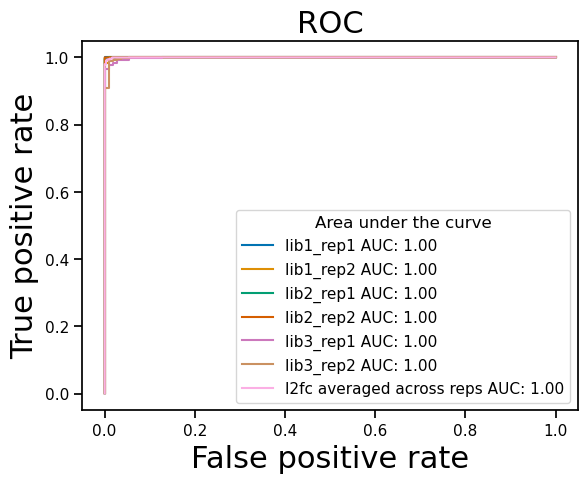

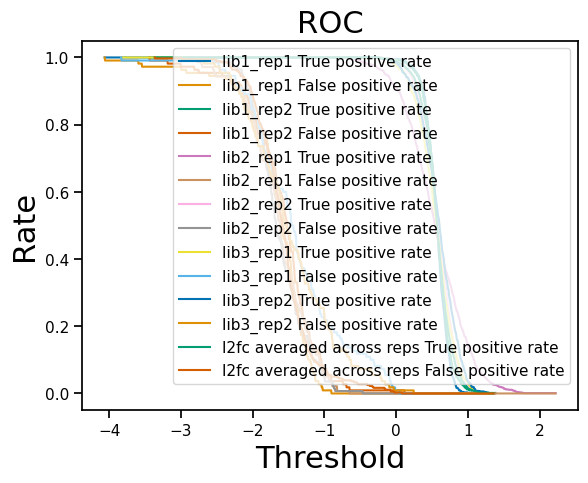

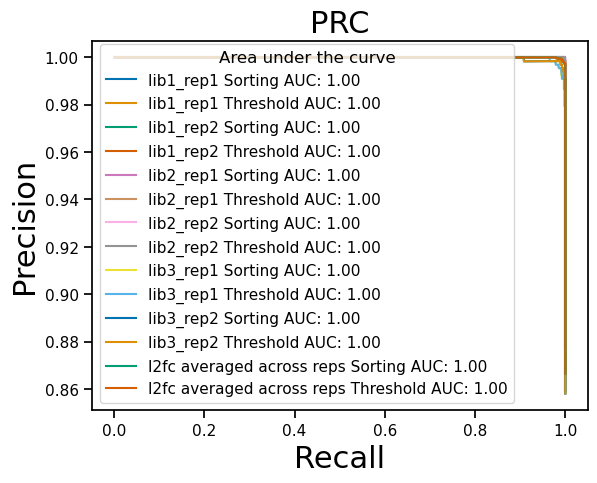

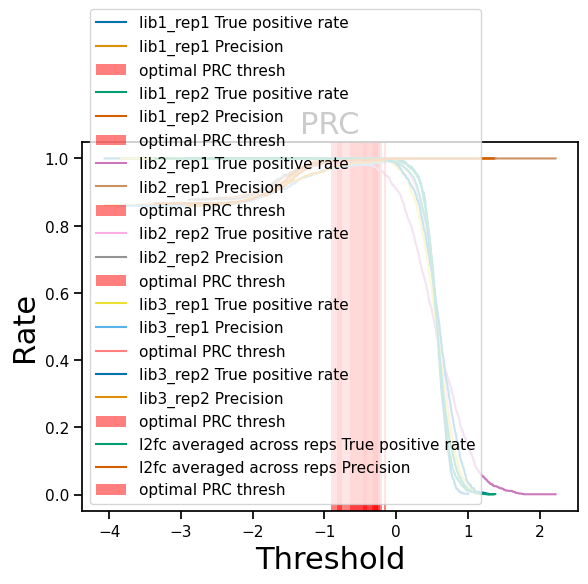

In [15]:
lib_merged.check_controls('AA',['WT'],['*'])
plt.show()

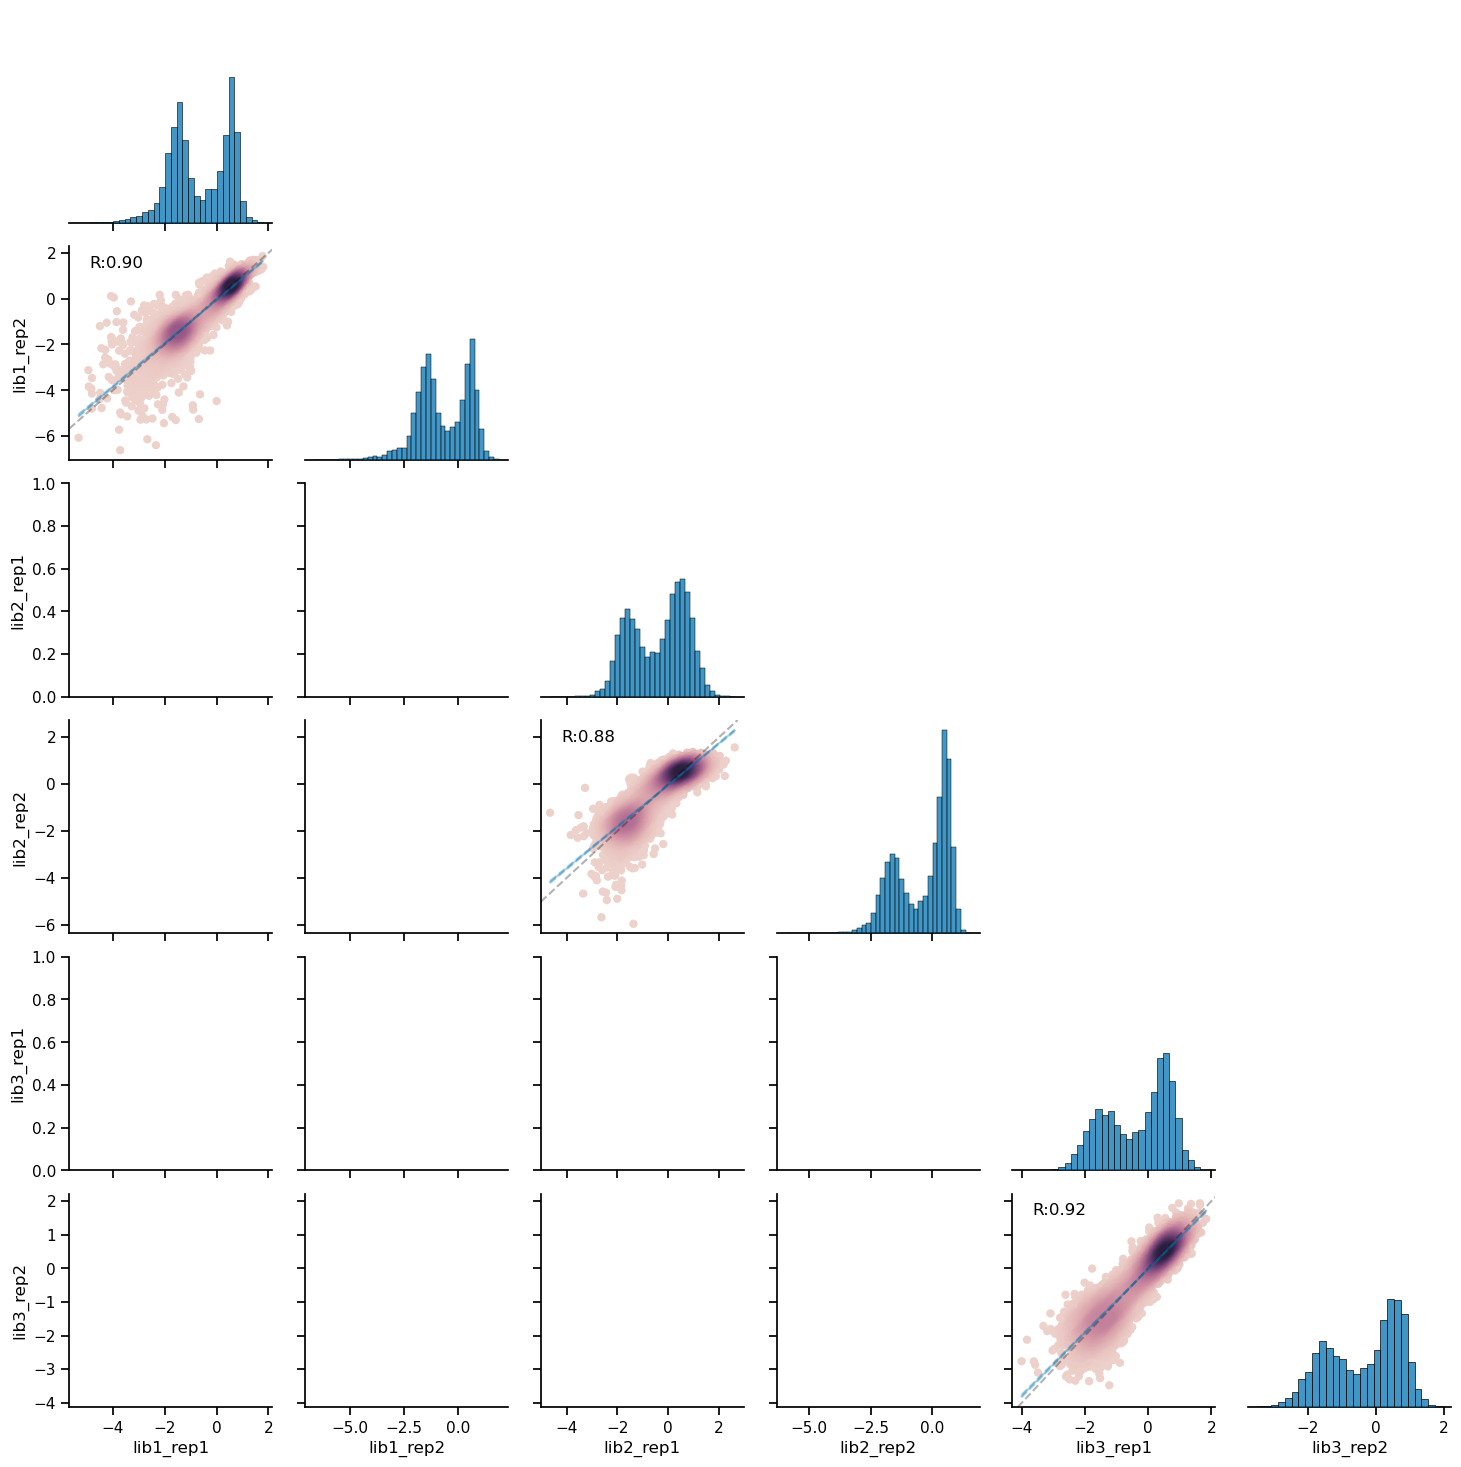

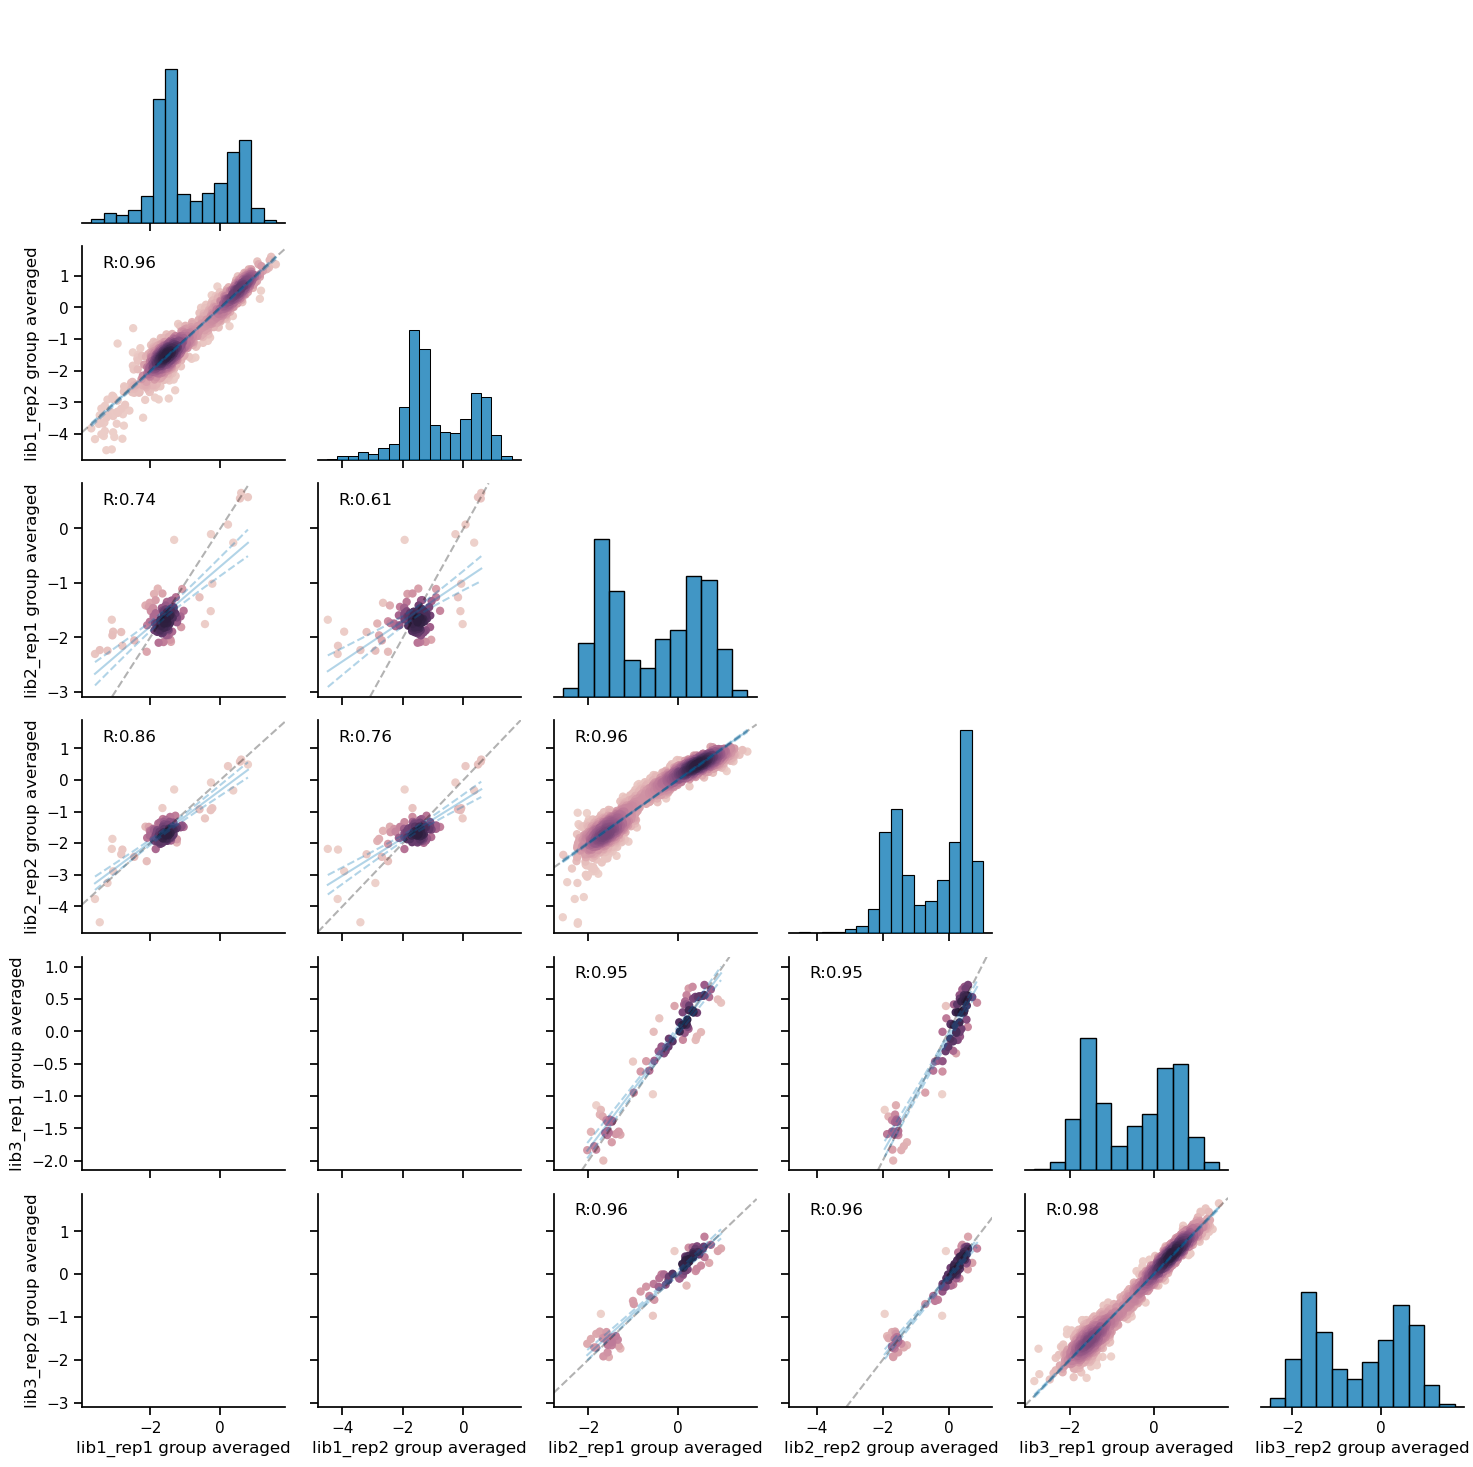

In [16]:
lib_merged.make_replicate_checks()
plt.show()

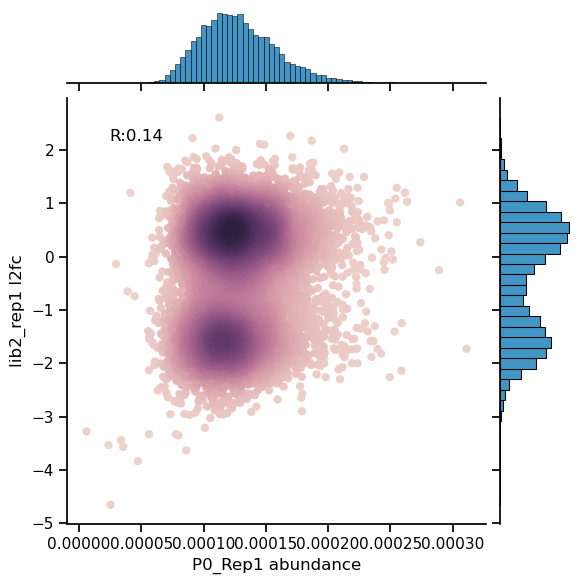

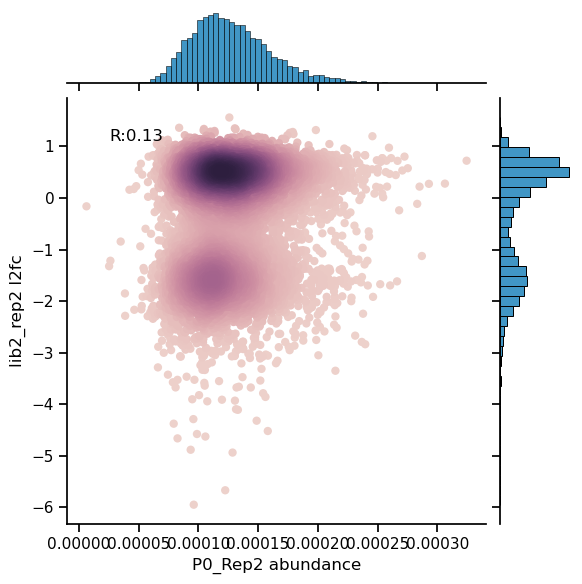

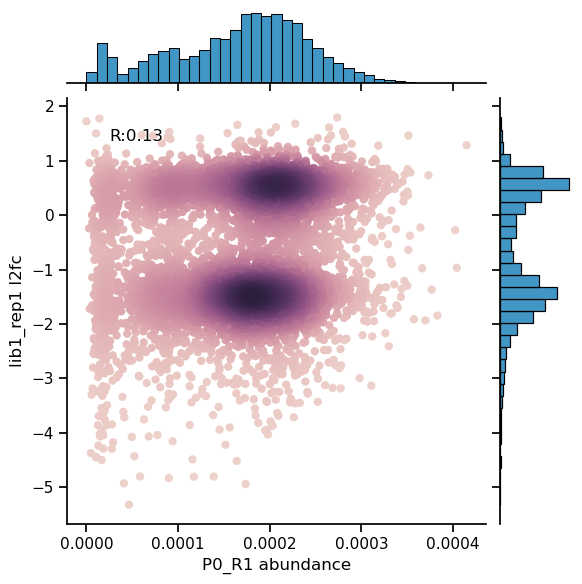

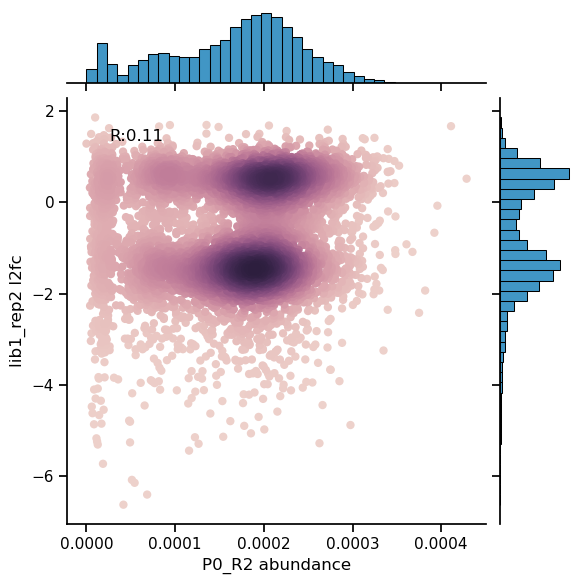

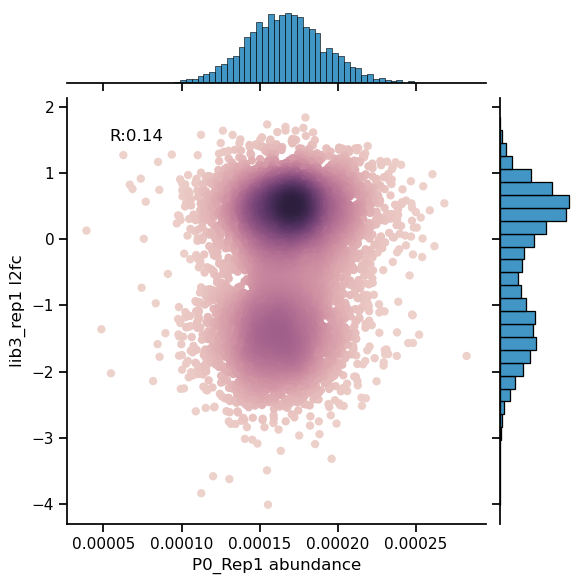

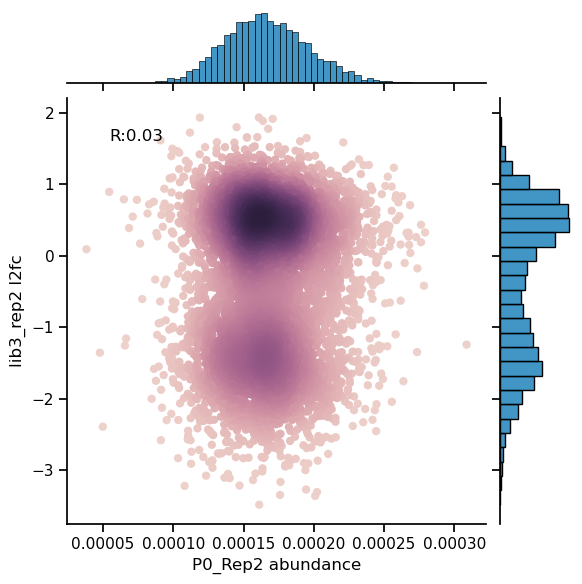

In [17]:
lib_merged.make_initial_skew_checks()
plt.show()

In [26]:
plot_features = True
plot_mutability = True
plot_properties = True


feature_sets=[
    {'name':'Segment resolved','positions':list(range(186, 258))+list(range(281, 341)), 'color':'xkcd:red'},
    {'name':'DNA interface','positions':[199,202,203,208,209,223,224,225,226,227,228,230,231,234,235,236,237,238,240,241,244,245,281,282,283,284,285,286,287,288,293,305,306,308,311,322,323,324,326,327,328,330,331,333,334,335,337,338], 'color':'xkcd:orchid'},
     {'name':'OCA-T1 interface','positions':[186,188,189,191,192,231,234,235,236,237,238,239,241,242,335,338,339], 'color':'xkcd:green'},
      {'name':'\n\nStructural\n    • Polar\n    • Non-Polar','positions':[194,201,202,207,209,220,226,233,238,241,246,252,255,256,297,299,303,304,308,310,322,328,329,332,333,], 'color':'xkcd:salmon'},
      {'name':'\n\nStructural\n    • Polar\n    • Non-Polar','positions':[198,212,216,232,242,249,292,296,311,314,318,320,325,], 'color':'xkcd:sienna'}
]

heatmap_fig, axd = lib_merged.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=183,
                                       rc_params={"figure.figsize" : (30,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm,allow_multi_rows=True
                                       )

cbar_width = 0.008
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()


In [24]:
plot_features = True
plot_mutability = False
plot_properties = False


feature_sets=[
    {'name':'Segment resolved','positions':list(range(186, 258))+list(range(281, 341)), 'color':'xkcd:red'},
    {'name':'DNA interface','positions':[199,202,203,208,209,223,224,225,226,227,228,230,231,234,235,236,237,238,240,241,244,245,281,282,283,284,285,286,287,288,293,305,306,308,311,322,323,324,326,327,328,330,331,333,334,335,337,338], 'color':'xkcd:orchid'},
     {'name':'OCA-T1 interface','positions':[186,188,189,191,192,231,234,235,236,237,238,239,241,242,335,338,339], 'color':'xkcd:green'},
      {'name':'\n\nStructural\n            • Polar\n            • Non-Polar','positions':[194,201,202,207,209,220,226,233,238,241,246,252,255,256,297,299,303,304,308,310,322,328,329,332,333,], 'color':'xkcd:salmon'},
      {'name':'\n\nStructural\n            • Polar\n            • Non-Polar','positions':[198,212,216,232,242,249,292,296,311,314,318,320,325,], 'color':'xkcd:sienna'}
]

heatmap_fig, axd = lib_merged.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=183,
                                       rc_params={"figure.figsize" : (30,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm,allow_multi_rows=True, plot_pos=(185,259)
                                       )

cbar_width = 0.008
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()
